# Картинки

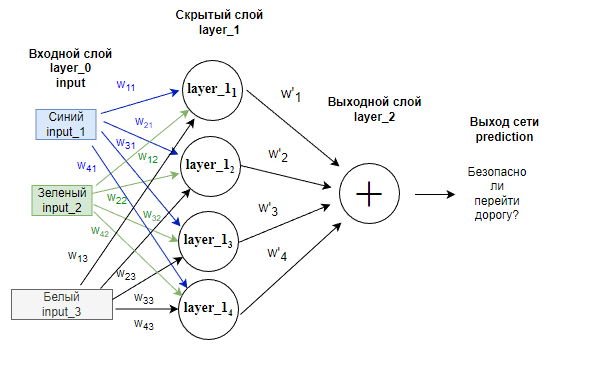

Введем обозначения:


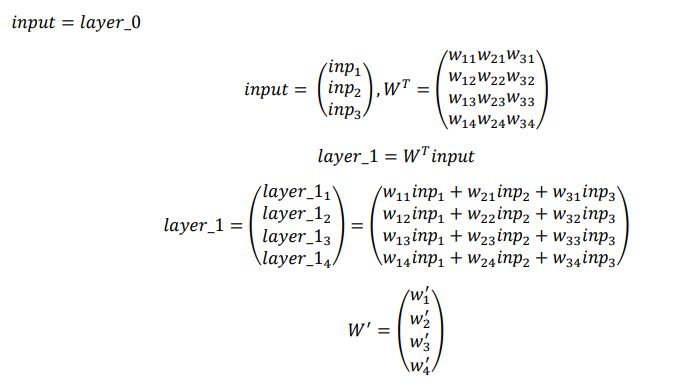

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



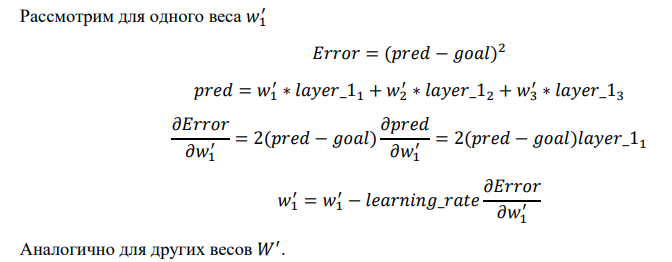

2.	Коррекция весов W:

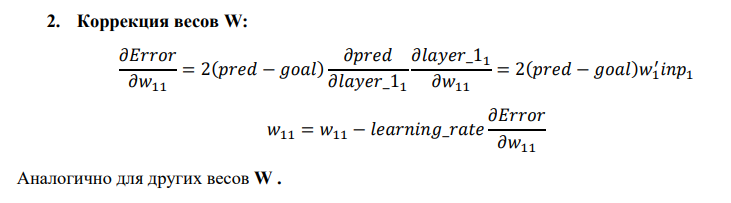

# 1. Реализуйте 1 итерацию обратного распространения. На выбор для 1 точки, для всех данных или для батча. Желательно в векторном виде.

In [2]:
# подключение 
import numpy as np
# обновление генератора случайных чисел
np.random.seed(42)

# входные данные
lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

# все исходы
walk_stop = np.array([[ 1, 1, 0, 0]]).T

# скорость обучения
learning_rate = 0.2

# размерность скрытого слоя
hidden_size = 4

# веса для входного и скрытого слоев
weights_input_layer = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_hidden_layer= 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 

# инициализируем 1 точку входных данных
input = lights[0] # [1,0,1]
# инициализируем правильный ответ
goal_prediction = walk_stop[0] #  0 - стоять, 1 - идти
# расчет скрытого слоя
layer1 = input.dot(weights_input_layer)
# расчет предсказания
prediction = layer1.dot(weights_hidden_layer)
# расчет ошибки
error = (prediction - goal_prediction) ** 2
# расчет произdодной ошибки для выходного слоя
weight_corrections_outer_layer = 2 * (prediction - goal_prediction) * layer1 # shape (4)
# для дальнейшей работы необходимо из вектора строки получить вектор столбец ---> воспользуемся reshape 
weight_corrections_outer_layer = weight_corrections_outer_layer.reshape(-1, 1) # shape (4,1)
# расчет произdодной ошибки для скрытого слоя
weight_corrections_hidden_layer = 2 * (prediction - goal_prediction)*weights_hidden_layer*input
# коррекция весов
weights_input_layer = weights_input_layer - learning_rate*weight_corrections_hidden_layer.T
weights_hidden_layer = weights_hidden_layer - learning_rate*weight_corrections_outer_layer
print("\nError:" + str(error) + " Prediction:" + str(prediction)) 


Error:[4.82036604] Prediction:[-1.1955332]
